### Import the required Repositories

In [190]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Read the train and test files

In [191]:
train_data = pd.read_csv("train.csv")

In [192]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
test_data  = pd.read_csv("test.csv")

In [194]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Check the info and analyze the missing data

In [195]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [196]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [197]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We can check for the unique values in the ticket column

In [198]:
train_data["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

As can be seen, the columns 'Name','PassengerId',"Ticket" are all irrelevant to our dataset as they have a large number of unique values

In [199]:
train_data =  train_data.drop(columns=['Name','PassengerId',"Ticket"],axis=1)
test_data =  test_data.drop(columns=["Name", "PassengerId", "Ticket"],axis=1)

In [200]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


We can now check for the unique value for the embarked column and the survival rate for each of the categories in `Embarked`

In [201]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

There are three categories in embarked and now we can check the survival rates in each category

<Axes: xlabel='Embarked', ylabel='Count'>

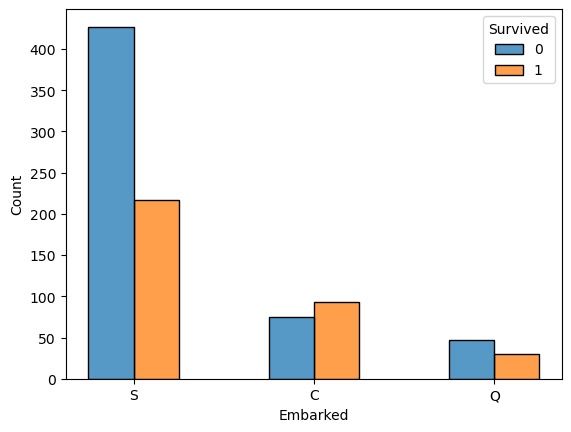

In [202]:
sns.histplot(x=train_data["Embarked"],hue= train_data["Survived"], multiple='dodge',shrink=0.5)

The above plot gives the survival rate for each `embarked` category

Next we look at the aplit up of each sex in the `survived` category

In [203]:
train_data[train_data["Sex"]=="female"]["Survived"].value_counts(normalize=True)*100

Survived
1    74.203822
0    25.796178
Name: proportion, dtype: float64

In [204]:
train_data[train_data["Sex"]=="male"]["Survived"].value_counts(normalize=True)*100

Survived
0    81.109185
1    18.890815
Name: proportion, dtype: float64

<Axes: xlabel='Sex', ylabel='Count'>

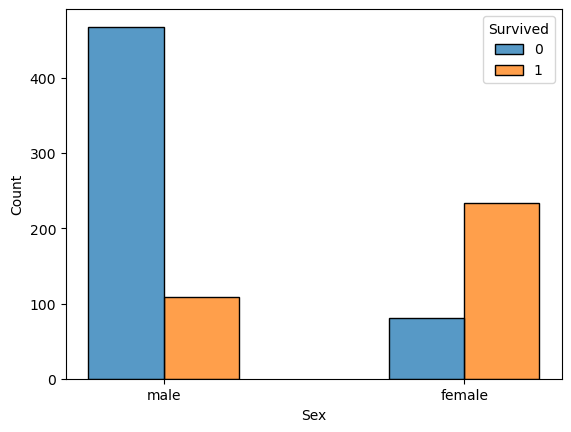

In [205]:
sns.histplot(x= train_data["Sex"],hue = train_data["Survived"],multiple='dodge', shrink=0.5)

<Axes: xlabel='Pclass', ylabel='Count'>

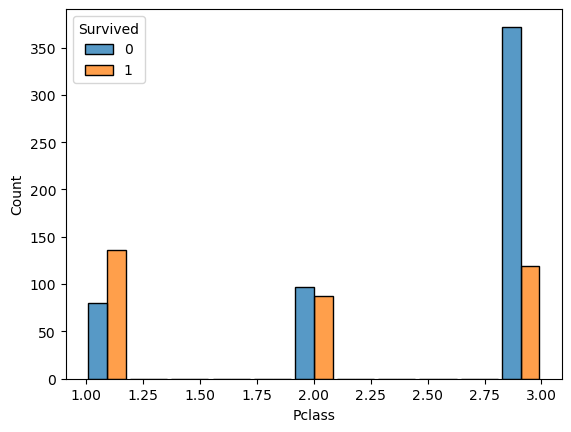

In [206]:
sns.histplot(x= train_data["Pclass"],hue = train_data["Survived"],multiple='dodge', shrink=0.9)

In [216]:
len(train_data["Cabin"].unique())

148

In [207]:
train_data["Cabin_no"] =  train_data["Cabin"].str[0]
test_data["Cabin_no"] =  test_data["Cabin"].str[0]

In [208]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_no
0,0,3,male,22.0,1,0,7.2500,NaN,S,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,NaN
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,NaN


<Axes: xlabel='Cabin_no', ylabel='Count'>

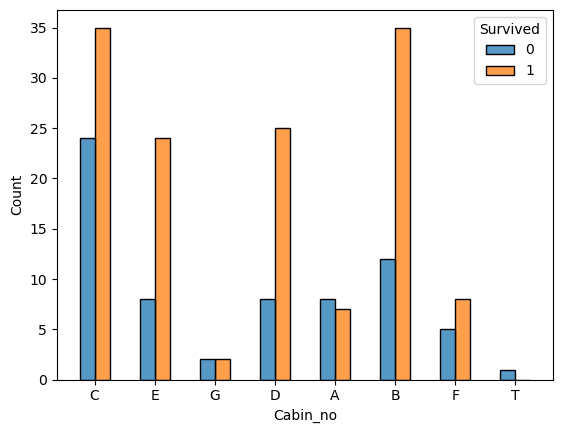

In [209]:
sns.histplot(x=train_data["Cabin_no"],hue= train_data["Survived"], multiple='dodge',shrink=0.5)

<Axes: xlabel='Cabin_no', ylabel='Fare'>

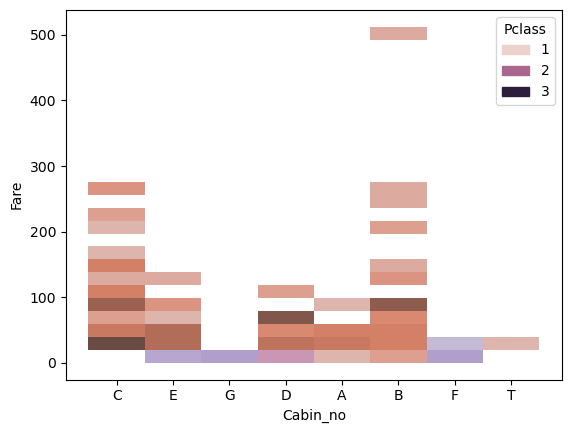

In [213]:
sns.histplot(x=train_data["Cabin_no"], y = train_data["Fare"],hue=train_data["Pclass"], multiple="dodge", shrink = 1.5)

In [225]:
train_data["Cabin_no"].value_counts()

Cabin_no
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [226]:
train_data["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [227]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Cabin_no    687
dtype: int64

In [228]:
train_data[train_data['Pclass']==1]["Cabin_no"].value_counts()

Cabin_no
C    59
B    47
D    29
E    25
A    15
T     1
Name: count, dtype: int64

In [229]:
train_data[train_data['Pclass']==2]["Cabin_no"].value_counts()

Cabin_no
F    8
D    4
E    4
Name: count, dtype: int64

In [230]:
train_data[train_data['Pclass']==3]["Cabin_no"].value_counts()

Cabin_no
F    5
G    4
E    3
Name: count, dtype: int64

In [231]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [232]:
for i in train_data['Pclass'].value_counts().index[:]:
    train_data.loc[(train_data["Pclass"]==i)&(train_data["Cabin_no"].isnull()),"Cabin_no"] = \
    train_data[train_data['Pclass']==i]["Cabin_no"].value_counts().index[0]

In [233]:
for i in test_data['Pclass'].value_counts().index[:]:
    test_data.loc[(test_data["Pclass"]==i)&(test_data["Cabin_no"].isnull()),"Cabin_no"] = \
    test_data[test_data['Pclass']==i]["Cabin_no"].value_counts().index[0]

In [234]:
train_data["Cabin_no"].value_counts()

Cabin_no
F    660
C     99
B     47
D     33
E     32
A     15
G      4
T      1
Name: count, dtype: int64

In [235]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_no
0,0,3,male,22.0,1,0,7.2500,NaN,S,F
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,F
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,NaN,S,F


<Axes: xlabel='Fare', ylabel='Count'>

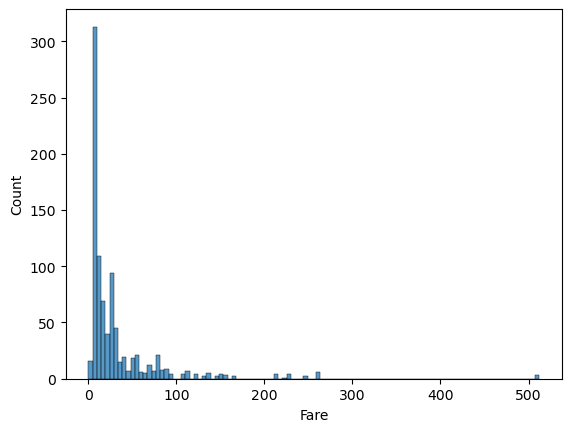

In [236]:
sns.histplot(data=train_data["Fare"],multiple='dodge')

In [237]:
train_data["Fare_cat"] =  train_data["Fare"]
test_data["Fare_cat"] =  test_data["Fare"]

In [238]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_no,Fare_cat
0,0,3,male,22.0,1,0,7.2500,NaN,S,F,7.2500
1,1,1,female,38.0,1,0,71.2833,C85,C,C,71.2833
2,1,3,female,26.0,0,0,7.9250,NaN,S,F,7.9250
3,1,1,female,35.0,1,0,53.1000,C123,S,C,53.1000
4,0,3,male,35.0,0,0,8.0500,NaN,S,F,8.0500


In [239]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_no,Fare_cat
0,3,male,34.5,0,0,7.8292,NaN,Q,F,7.8292
1,3,female,47.0,1,0,7.0000,NaN,S,F,7.0000
2,2,male,62.0,0,0,9.6875,NaN,Q,F,9.6875
3,3,male,27.0,0,0,8.6625,NaN,S,F,8.6625
4,3,female,22.0,1,1,12.2875,NaN,S,F,12.2875


In [240]:
for index in range  (train_data.shape[0]):
    if train_data.loc[index,'Fare']<=20:
        train_data.loc[index,"Fare_cat"] = 1
    elif (train_data.loc[index,'Fare']>20) & (train_data.loc[index,'Fare']<=50):
        train_data.loc[index,'Fare_cat']= 2
    elif (train_data.loc[index,'Fare']>50) & (train_data.loc[index,'Fare']<=100):
        train_data.loc[index,'Fare_cat']= 3
    else:
        train_data.loc[index,'Fare_cat']= 4

In [241]:
for index in range  (test_data.shape[0]):
    if test_data.loc[index,'Fare']<=20:
        test_data.loc[index,"Fare_cat"] = 1
    elif (test_data.loc[index,'Fare']>20) & (test_data.loc[index,'Fare']<=50):
        test_data.loc[index,'Fare_cat']= 2
    elif (test_data.loc[index,'Fare']>50) & (test_data.loc[index,'Fare']<=100):
        test_data.loc[index,'Fare_cat']= 3
    else:
        test_data.loc[index,'Fare_cat']= 4

In [242]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_no,Fare_cat
0,0,3,male,22.0,1,0,7.2500,NaN,S,F,1.0
1,1,1,female,38.0,1,0,71.2833,C85,C,C,3.0
2,1,3,female,26.0,0,0,7.9250,NaN,S,F,1.0
3,1,1,female,35.0,1,0,53.1000,C123,S,C,3.0
4,0,3,male,35.0,0,0,8.0500,NaN,S,F,1.0


In [243]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_no,Fare_cat
0,3,male,34.5,0,0,7.8292,NaN,Q,F,1.0
1,3,female,47.0,1,0,7.0000,NaN,S,F,1.0
2,2,male,62.0,0,0,9.6875,NaN,Q,F,1.0
3,3,male,27.0,0,0,8.6625,NaN,S,F,1.0
4,3,female,22.0,1,1,12.2875,NaN,S,F,1.0


In [244]:
train_data =  train_data.drop(columns=["Fare","Cabin"],axis=1)
test_data =  test_data.drop(columns=["Fare","Cabin"],axis=1)

In [245]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_no,Fare_cat
0,0,3,male,22.0,1,0,S,F,1.0
1,1,1,female,38.0,1,0,C,C,3.0
2,1,3,female,26.0,0,0,S,F,1.0
3,1,1,female,35.0,1,0,S,C,3.0
4,0,3,male,35.0,0,0,S,F,1.0


In [246]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_no,Fare_cat
0,3,male,34.5,0,0,Q,F,1.0
1,3,female,47.0,1,0,S,F,1.0
2,2,male,62.0,0,0,Q,F,1.0
3,3,male,27.0,0,0,S,F,1.0
4,3,female,22.0,1,1,S,F,1.0


<Axes: xlabel='Age', ylabel='Count'>

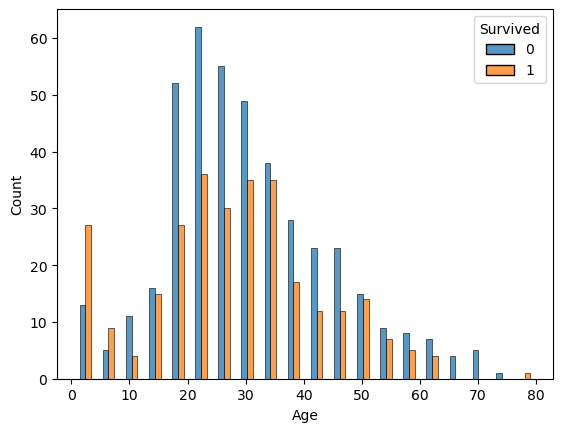

In [247]:
sns.histplot(x= train_data["Age"],hue= train_data["Survived"], multiple="dodge",shrink=0.5)

In [248]:
train_data["Age_Cat"] = train_data["Age"]
test_data["Age_Cat"] = test_data["Age"]

In [249]:
for index in range  (train_data.shape[0]):
    if train_data.loc[index,'Age']<=20:
        train_data.loc[index,"Age_Cat"] = 1
    elif (train_data.loc[index,'Age']>20) & (train_data.loc[index,'Age']<=40):
        train_data.loc[index,'Age_Cat']= 2
    elif (train_data.loc[index,'Age']>40) & (train_data.loc[index,'Age']<=60):
        train_data.loc[index,'Age_Cat']= 3
    else:
        train_data.loc[index,'Age_Cat']= 4

In [250]:
for index in range  (test_data.shape[0]):
    if test_data.loc[index,'Age']<=20:
        test_data.loc[index,"Age_Cat"] = 1
    elif (test_data.loc[index,'Age']>20) & (test_data.loc[index,'Age']<=40):
        test_data.loc[index,'Age_Cat']= 2
    elif (test_data.loc[index,'Age']>40) & (test_data.loc[index,'Age']<=60):
        test_data.loc[index,'Age_Cat']= 3
    else:
        test_data.loc[index,'Age_Cat']= 4

In [251]:
train_data=train_data.drop(columns=["Age"],axis=1)
test_data = test_data.drop(columns=["Age"],axis=1)

In [252]:
print("missing values in train data \n" ,train_data.isna().sum())
print("missing values in test data \n" ,test_data.isna().sum())

missing values in train data 
 Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
Cabin_no    0
Fare_cat    0
Age_Cat     0
dtype: int64
missing values in test data 
 Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Cabin_no    0
Fare_cat    0
Age_Cat     0
dtype: int64


In [253]:
train_data=train_data.dropna(axis=0)

In [254]:
test_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Cabin_no,Fare_cat,Age_Cat
0,3,male,0,0,Q,F,1.0,2.0
1,3,female,1,0,S,F,1.0,3.0
2,2,male,0,0,Q,F,1.0,4.0
3,3,male,0,0,S,F,1.0,2.0
4,3,female,1,1,S,F,1.0,2.0


In [255]:
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_no,Fare_cat,Age_Cat
0,0,3,male,1,0,S,F,1.0,2.0
1,1,1,female,1,0,C,C,3.0,2.0
2,1,3,female,0,0,S,F,1.0,2.0
3,1,1,female,1,0,S,C,3.0,2.0
4,0,3,male,0,0,S,F,1.0,2.0


In [256]:
print("missing values in train data \n" ,train_data.isna().sum())
print("missing values in test data \n" ,test_data.isna().sum())

missing values in train data 
 Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Cabin_no    0
Fare_cat    0
Age_Cat     0
dtype: int64
missing values in test data 
 Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Cabin_no    0
Fare_cat    0
Age_Cat     0
dtype: int64


In [257]:
le =  LabelEncoder()
train_data["Cabin_no"] =  le.fit_transform(train_data["Cabin_no"])
test_data["Cabin_no"] =  le.fit_transform(test_data["Cabin_no"])

In [258]:
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_no,Fare_cat,Age_Cat
0,0,3,male,1,0,S,5,1.0,2.0
1,1,1,female,1,0,C,2,3.0,2.0
2,1,3,female,0,0,S,5,1.0,2.0
3,1,1,female,1,0,S,2,3.0,2.0
4,0,3,male,0,0,S,5,1.0,2.0


In [259]:
test_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Cabin_no,Fare_cat,Age_Cat
0,3,male,0,0,Q,5,1.0,2.0
1,3,female,1,0,S,5,1.0,3.0
2,2,male,0,0,Q,5,1.0,4.0
3,3,male,0,0,S,5,1.0,2.0
4,3,female,1,1,S,5,1.0,2.0


In [260]:
features = ["Pclass", "Sex", "SibSp", "Parch","Embarked","Cabin_no","Fare_cat","Age_Cat"]
y =  train_data["Survived"]
X = pd.get_dummies(train_data[features],drop_first=True).astype(int)

In [261]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [262]:
X.head()

,Pclass,SibSp,Parch,Cabin_no,Fare_cat,Age_Cat,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,5,1,2,1,0,1
1,1,1,0,2,3,2,0,0,0
2,3,0,0,5,1,2,0,0,1
3,1,1,0,2,3,2,0,0,1
4,3,0,0,5,1,2,1,0,1


In [263]:
X_test.isna().sum()

Pclass        0
SibSp         0
Parch         0
Cabin_no      0
Fare_cat      0
Age_Cat       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [264]:
X_test =  pd.get_dummies(test_data[features],drop_first=True).astype(int)

In [265]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'accuracy': [accuracy],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1]
                        })
  
    return table

In [285]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [2,4,6,8,None], 
             'max_features': [0.3,0.5,0.7,1.0],
             'max_samples': [0.3,0.5,0.7,1.0],
             'min_samples_leaf': [1,2,4,8,16],
             'min_samples_split': [1,2,4,8,16],
             'n_estimators': [50,100,200,300,400,500]
             }  

scoring =  ["accuracy","precision","recall","f1"]

rf_cv =  GridSearchCV(rf, cv_param, scoring=scoring, cv =5,refit='precision')

In [267]:
%%time
rf_cv.fit(X,y)

CPU times: total: 6min 22s
Wall time: 6min 32s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, None], 'max_features': [0.7, 1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 300]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [268]:
rf_cv.best_params_

{'max_depth': 2,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [270]:
rf_cv_results =  make_results("decision tree",rf_cv,'precision')

In [271]:
rf_cv_results

,model,accuracy,precision,recall,f1
0,decision tree,0.776182,0.846531,0.535294,0.640126


In [272]:
X_test.head()

,Pclass,SibSp,Parch,Cabin_no,Fare_cat,Age_Cat,Sex_male,Embarked_Q,Embarked_S
0,3,0,0,5,1,2,1,1,0
1,3,1,0,5,1,3,0,0,1
2,2,0,0,5,1,4,1,1,0
3,3,0,0,5,1,2,1,0,1
4,3,1,1,5,1,2,0,0,1


In [273]:
test_data =  pd.read_csv("test.csv")

In [274]:
preds  =  rf_cv.best_estimator_.predict(X_test)

In [275]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': preds})
output.to_csv('submission_rf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [286]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

cv_params = {'max_depth': [2,4,6,8,None], 
             'max_features': [0.3,0.5,0.7,1.0],
             'max_samples': [0.3,0.5,0.7,1.0],
             'min_samples_leaf': [1,2,4,8,16],
             'min_samples_split': [1,2,4,8,16],
             'n_estimators': [50,100,200,300,400,500]
             }  

scoring =  ["accuracy","precision","recall","f1"]

xgb_cv =  GridSearchCV(rf, cv_param, scoring=scoring, cv =4,refit='precision')

In [277]:
%%time
xgb_cv.fit(X,y)

CPU times: total: 6min 34s
Wall time: 6min 50s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, None], 'max_features': [0.7, 1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 300]},
             refit='precision',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [278]:
xgb_cv.best_score_

0.846531088143893

In [284]:
xgb_cv.best_params_

{'max_depth': 2,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [280]:
xgb_cv_results =  make_results("decision tree",xgb_cv,'precision')

In [281]:
xgb_cv_results

,model,accuracy,precision,recall,f1
0,decision tree,0.776182,0.846531,0.535294,0.640126


In [282]:
preds  =  xgb_cv.best_estimator_.predict(X_test)

In [283]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': preds})
output.to_csv('submission_xgb.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
